# Table of contents
* [1 Initial Data Cleaning and Preparation](#introduction)
    - [1.1 Import Data](#subparagraph1)
    - [1.2 Data Preview](#subparagraph1)
    - [1.3 Data Cleaning](#subparagraph1)
    - [1.4 Final Data Preview](#subparagraph1)   
* [2 Filtering, Grouping, EDA](#introduction)
    - [2.1 Age](#subparagraph1)
    - [2.2 Gender](#subparagraph1)
    - [2.3 Smoking](#subparagraph1)
    - [2.4 BMI](#subparagraph1)
    - [2.5 Blood Glucose Level](#subparagraph1)
    - [2.6 HbA1c_level(Hemoglobin A1c) ](#subparagraph1)
    - [2.7 Health Profile ](#subparagraph1)
* [3 Visualizations](#introduction)
    - [3.1 Age Group and Young vs Old Bar Chart](#subparagraph1)
    - [3.2 Male vs Female Bar Chart](#subparagraph1)
    - [3.3 BMI Groups Stacked Bar Chart](#subparagraph1)
    - [3.4 Male/Female Smokers by Age Distribution Histogram](#subparagraph1)
    - [3.5 Health Profile Conditions Facet Grid](#subparagraph1)
    - [3.6 Pearson Correlation Heat Map](#subparagraph1)
    - [3.7 Pair Plot Numerical Data](#subparagraph1)
* [4 Summary](#introduction)
    - [4.1 Report](#subparagraph1)

## Initial Data Cleaning and Preparation <a name="paragraph1"></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Import Data <a name="paragraph1"></a>

In [33]:
df = pd.read_csv(r'C:\Users\coope\Documents\Tech\Data Analytics\Projects\Diabeties Project\diabetes.csv')
pd.set_option('display.max.rows', 100000)
pd.set_option('display.max.columns', 9)

### Data Preview <a name="paragraph1"></a>

In [35]:
# Data in this case is mostly clean, with no null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [37]:
print("Data Shape:", df.shape)

Data Shape: (100000, 9)


In [39]:
print("Num Missing Values:\n", df.isnull().sum())

Num Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### Data Cleaning<a name="paragraph1"></a>

In [41]:
print("Num of Duplicate Values", df.duplicated().sum())

Num of Duplicate Values 3854


In [79]:
# In this case I had 3854 duplicates, 
# The chances of all these values being the same amongst multiple people are very low and we can assume that these should be dropped
df.drop_duplicates(keep=False, inplace = True)

In [349]:
# Aftter dropping duplicate values I am left with 92586 entries
df.shape[0]

92586

In [256]:
pd.set_option('display.max.columns', 12)
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Age_Group,BMI_Group
0,Female,80,0,1,Never,25.19,6.6,140,0,71 - 100,Overweight
2,Male,28,0,0,Never,27.32,5.7,158,0,21 - 30,Overweight
3,Female,36,0,0,Current,23.45,5.0,155,0,31 - 40,Healthy weight
4,Male,76,1,1,Current,20.14,4.8,155,0,71 - 100,Healthy weight
5,Female,20,0,0,Never,27.32,6.6,85,0,11 - 20,Overweight
6,Female,44,0,0,Never,19.31,6.5,200,1,41 - 50,Healthy weight
7,Female,79,0,0,No Info,23.86,5.7,85,0,71 - 100,Healthy weight
8,Male,42,0,0,Never,33.64,4.8,145,0,41 - 50,Obese
9,Female,32,0,0,Never,27.32,5.0,100,0,31 - 40,Overweight
11,Female,54,0,0,Former,54.70,6.0,100,0,51 - 60,Obese


In [81]:
# Converting age to int since it shouldnt be a decimal
df['age'] = df['age'].astype(int)

In [85]:
# Some small corrections to smoking history column
# There were a large amount of entries which included "ever" we can assume this was suppose to be "Never" following trends of the data
# Along with this "not current" has been adjusted to "Former" as this is generally used to describe someone who has a past history of smoking
df['smoking_history'] = df['smoking_history'].replace({'never':'Never'})
df['smoking_history'] = df['smoking_history'].replace({'current':'Current'})
df['smoking_history'] = df['smoking_history'].replace({'not current':'Former'})
df['smoking_history'] = df['smoking_history'].replace({'former':'Former'})
df['smoking_history'] = df['smoking_history'].replace({'ever':'Never'})

In [351]:
# I will analyze young vs old, but I also wanted to add an additional detailed analysis by categorizing ages
age_groups = [(1, 10), (11,20), (21,30), (31,40), (41,50), (51,60), (61,70), (71,100)]

def assign_age_group(age):
    for age_range in age_groups:
        if age_range[0] <= age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")
df['Age_Group'] = df['age'].apply(assign_age_group)

In [353]:
# Here I am analyzing average BMI values and categorizing them into BMI groups based on World Health Organization (WHO) guidelines.
bmi_groups = [(0.0, 18.5, 'Underweight'), (18.6,24.9, 'Healthy weight'), (25.0,29.9, 'Overweight'), (30.0,100.0, 'Obese')]

def assign_bmi_group(bmi):
    for lower,upper, label in bmi_groups:
        if lower <= bmi <= upper:
            return label
    return("Unknown")
df['BMI_Group'] = df['bmi'].apply(assign_bmi_group)

### Final Data Preview <a name="paragraph1"></a>

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92586 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               92586 non-null  object 
 1   age                  92586 non-null  int32  
 2   hypertension         92586 non-null  int64  
 3   heart_disease        92586 non-null  int64  
 4   smoking_history      92586 non-null  object 
 5   bmi                  92586 non-null  float64
 6   HbA1c_level          92586 non-null  float64
 7   blood_glucose_level  92586 non-null  int64  
 8   diabetes             92586 non-null  int64  
 9   Age_Group            92586 non-null  object 
 10  BMI_Group            92586 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 8.1+ MB


In [355]:
# Finalized and cleaned DataFrame, incorporating new columns to facilitate EDA and visualizations.
df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Age_Group,BMI_Group
0,Female,80,0,1,Never,25.19,6.6,140,0,71 - 100,Overweight
2,Male,28,0,0,Never,27.32,5.7,158,0,21 - 30,Overweight
3,Female,36,0,0,Current,23.45,5.0,155,0,31 - 40,Healthy weight
4,Male,76,1,1,Current,20.14,4.8,155,0,71 - 100,Healthy weight
5,Female,20,0,0,Never,27.32,6.6,85,0,11 - 20,Overweight
6,Female,44,0,0,Never,19.31,6.5,200,1,41 - 50,Healthy weight
7,Female,79,0,0,No Info,23.86,5.7,85,0,71 - 100,Healthy weight
8,Male,42,0,0,Never,33.64,4.8,145,0,41 - 50,Obese
9,Female,32,0,0,Never,27.32,5.0,100,0,31 - 40,Overweight
11,Female,54,0,0,Former,54.70,6.0,100,0,51 - 60,Obese


# Filtering, Grouping, EDA <a name="paragraph1"></a>

In [364]:
# I conducted preliminary exploratory data analysis (EDA) to generate useful tables and key metrics for future visualizations.

### Age <a name="paragraph1"></a>

In [362]:
# Creating a reference for all the entries that were positive and negative for diabetes
positive_diabetes = df[df['diabetes'] == 1]
negative_diabetes = df[df['diabetes'] == 0]

# Group by age categories young & old 
# Old 36+
old = positive_diabetes[positive_diabetes['age'] > 36].shape[0]
young = positive_diabetes[positive_diabetes['age'] <= 36].shape[0]

In [200]:
print("Total of entries over 36 that were positive:" + " " + str(old) + "/" + str(old + young))
print("Total of entries under 36 that were positive:" + " " + str(young) + "/" + str(old + young))

Total of entries over 36 that were positive: 7937/8463
Total of entries under 36 that were positive: 526/8463


### Gender <a name="paragraph1"></a>

In [ ]:
# Collecting key metrics on gender and analyzing the correlation between gender and diabetes.

In [238]:
nonbin = df[(df['gender'] != "Male") & (df['gender'] != "Female")]
nonbin.shape[0]

18

In [232]:
male_count = df[(df['gender'] == "Male")].shape[0]
male_count

38606

In [234]:
male_diabeties = positive_diabetes[(positive_diabetes['gender'] == 'Male')].shape[0]
male_diabeties

4031

In [230]:
female_count =df[(df['gender'] == "Female")].shape[0]
female_count

53962

In [236]:
female_diabeties = positive_diabetes[(positive_diabetes['gender'] == 'Female')].shape[0]
female_diabeties

4432

In [394]:
# Pivot table for positive diabetes counts by age_group/gender

In [390]:
pivot_age_gender = pd.pivot_table(
    df,
    values='diabetes',
    index='Age_Group',
    columns='gender',
    aggfunc=lambda x: (x == 1).sum(),
    fill_value=0
)

In [392]:
pivot_age_gender.head(100)

gender,Female,Male,Other
Age_Group,,,
1 - 10,17,12,0
11 - 20,42,42,0
21 - 30,112,76,0
31 - 40,272,206,0
41 - 50,540,527,0
51 - 60,983,940,0
61 - 70,1144,1083,0
71 - 100,1322,1145,0
Unknown,0,0,0


In [426]:
female_smokers = positive_diabetes[(positive_diabetes['smoking_history'] == 'Current') & (positive_diabetes['gender'] == 'Female')]
male_smokers = positive_diabetes[(positive_diabetes['smoking_history'] == 'Current') & (positive_diabetes['gender'] == 'Male')]

### Smoking <a name="paragraph1"></a>

In [311]:
# Grouping data by smoking history and diabetes status to count the number of cases for each combination.
diabetes_by_smoking = df.groupby(['smoking_history', 'diabetes']).size().reset_index(name='Count')

In [315]:
diabetes_by_smoking.head(10)

,smoking_history,diabetes,Count
0,Current,0,8164
1,Current,1,948
2,Former,0,13089
3,Former,1,2280
4,Never,0,33751
5,Never,1,3799
6,No Info,0,29119
7,No Info,1,1436


In [406]:
pivot_bmi_smoking = pd.pivot_table(
    df,
    values='diabetes',
    index='BMI_Group',
    columns='smoking_history',
    aggfunc=lambda x: (x == 1).sum(),
    fill_value=0
)

In [410]:
pivot_bmi_smoking.head(10)

smoking_history,Current,Former,Never,No Info
BMI_Group,,,,
Healthy weight,120,210,399,107
Obese,460,1216,2004,551
Overweight,346,830,1333,751
Underweight,11,9,28,16
Unknown,11,15,35,11


### BMI <a name="paragraph1"></a>

In [549]:
bmi_health_counts = positive_diabetes.groupby('BMI_Group').agg(
    Diabetes_Count=('BMI_Group', 'size'),  # Count of entries per BMI group
    Hypertension_Count=('hypertension', 'sum'),  # Sum of hypertension occurrences
    Heart_Disease_Count=('heart_disease', 'sum')  # Sum of heart disease occurrences
).reset_index()

In [553]:
bmi_health_counts.head(6)

,BMI_Group,Diabetes_Count,Hypertension_Count,Heart_Disease_Count
0,Healthy weight,836,185,151
1,Obese,4231,1143,594
2,Overweight,3260,738,507
3,Underweight,64,7,4
4,Unknown,72,11,11


In [335]:
# Group by BMI_Group and smoking_history, then count the number of positive cases in each combination
bmi_smoking_diabetes['smoking_history_combined'] = df['smoking_history'].replace({'Current': 'Smokers', 'Former': 'Smokers'})
combined_smoking_counts = bmi_smoking_diabetes.groupby(['BMI_Group', 'smoking_history_combined']).agg({'Positive_Count': 'sum'}).reset_index()
combined_smoking_counts = combined_smoking_counts[combined_smoking_counts['smoking_history_combined'] != 'No Info']

combined_smoking_counts.head(8)

,BMI_Group,smoking_history_combined,Positive_Count
0,Healthy weight,Never,519
1,Healthy weight,Smokers,107
2,Obese,Never,3220
4,Obese,Smokers,460
5,Overweight,Never,1176
6,Overweight,Smokers,751
7,Underweight,Never,9
9,Underweight,Smokers,11


### Blood Glucose Level<a name="paragraph1"></a>

In [366]:
# Avg blood glucose level for all positive diabetes entries vs negative diabetes entries

In [286]:
avg_bgl_positive_diabetes = positive_diabetes['blood_glucose_level'].mean().round(2)
avg_bgl_positive_diabetes

193.96

In [288]:
avg_bgl_negative_diabetes = negative_diabetes['blood_glucose_level'].mean().round(2)
avg_bgl_negative_diabetes

132.79

### HbA1c_level(Hemoglobin A1c) <a name="paragraph1"></a>

In [ ]:
# Avg HbA1c_level level for all positive diabetes entries vs negative diabetes entries

In [295]:
avg_HbA1c_positive_diabetes = positive_diabetes['HbA1c_level'].mean().round(2)
avg_HbA1c_positive_diabetes

6.93

In [299]:
avg_HbA1c_negative_diabetes = negative_diabetes['HbA1c_level'].mean().round(2)
avg_HbA1c_negative_diabetes

5.4

### Health Profile <a name="paragraph1"></a>

In [372]:
# Aggregating the data by hypertension status, heart disease status, 
# and diabetes status to count the number of cases for each combination of these health conditions.
health_profile = df.groupby(['Age_Group', 'BMI_Group', 'hypertension', 'heart_disease', 'diabetes']).size().reset_index(name='Count')

In [370]:
health_profile.head(100)

,Age_Group,BMI_Group,hypertension,heart_disease,diabetes,Count
0,1 - 10,Healthy weight,0,0,0,1832
1,1 - 10,Healthy weight,0,0,1,7
2,1 - 10,Healthy weight,0,1,0,1
3,1 - 10,Healthy weight,1,0,0,1
4,1 - 10,Obese,0,0,0,93
5,1 - 10,Obese,1,0,0,1
6,1 - 10,Overweight,0,0,0,1378
7,1 - 10,Overweight,0,0,1,4
8,1 - 10,Overweight,0,1,0,2
9,1 - 10,Overweight,1,0,0,1


In [374]:
# Summarizing the data by grouping hypertension status, heart disease status, 
# and diabetes status to show the count of cases for each combination of these health conditions.
diabetes_by_conditions = df.groupby(['hypertension', 'heart_disease', 'diabetes']).size().reset_index(name='Count')
diabetes_by_conditions

,hypertension,heart_disease,diabetes,Count
0,0,0,0,76697
1,0,0,1,5470
2,0,1,0,2078
3,0,1,1,909
4,1,0,0,4792
5,1,0,1,1726
6,1,1,0,556
7,1,1,1,358


# Visualizations <a name="paragraph1"></a>

In [649]:
# In this section, we will create a series of visualizations to explore and present the data effectively. 
# We will generate plots to analyze the distribution of positive diabetes cases across different categories,
# including age groups, BMI groups, and the interplay of various health conditions such as hypertension and heart disease.

### Age Group and Young vs Old Bar Chart<a name="paragraph1"></a>

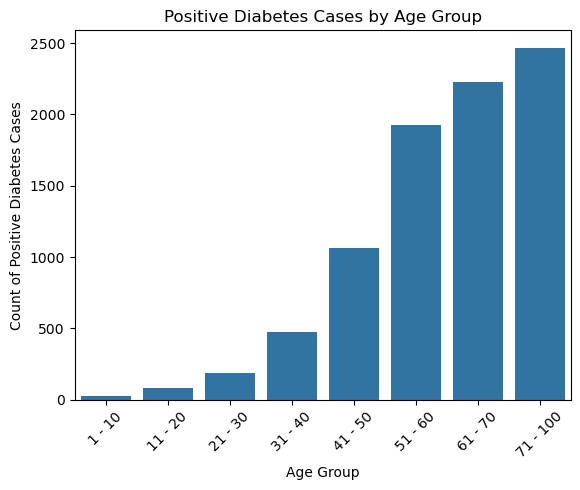

In [645]:
# Order for the age groups
age_order = ['1 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 100']

# Simple bar chart graphing established age groups by the number of positive diabetes cases within those groups
age_group_counts = positive_diabetes['Age_Group'].value_counts().reindex(age_order, fill_value=0).reset_index()
age_group_counts.columns = ['Age_Group', 'Positive_Count']

sns.barplot(data=age_group_counts, x='Age_Group', y='Positive_Count', order=age_order)

plt.title('Positive Diabetes Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Positive Diabetes Cases')
plt.xticks(rotation=45)
plt.show()

### Male vs Female Bar Chart<a name="paragraph1"></a>

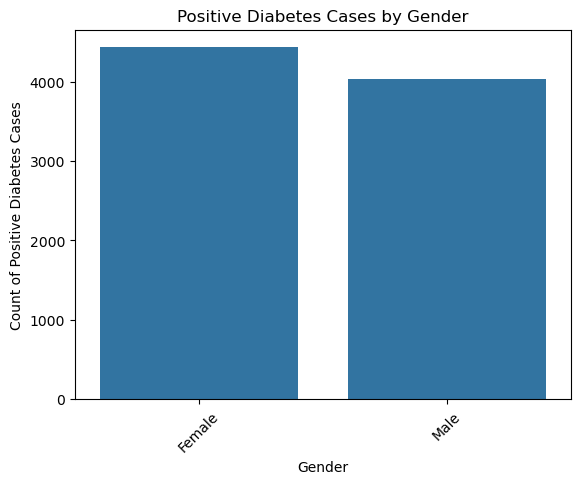

In [653]:
# Male vs female by positive diabetes cases
gender_group_counts = positive_diabetes['gender'].value_counts().reset_index()
gender_group_counts.columns = ['gender', 'Positive_Count']

sns.barplot(data=gender_group_counts, x='gender', y='Positive_Count')

plt.title('Positive Diabetes Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Positive Diabetes Cases')

plt.xticks(rotation=45)
plt.show()

In [655]:
# Its important to keep in mind that the dataset favors females by about 60-40

In [689]:
print("Female Count Total:", df[(df['gender'] == 'Female')].shape[0], "\n", 
      "Male Count Total:", df[(df['gender'] == 'Male')].shape[0])

Female Count Total: 53962 
 Male Count Total: 38606


In [695]:
print("Female Positive Count Total:", positive_diabetes[(positive_diabetes['gender'] == 'Female')].shape[0], "\n", 
      "Male Positive Count Total:", positive_diabetes[(positive_diabetes['gender'] == 'Male')].shape[0])

Female Positive Count Total: 4432 
 Male Positive Count Total: 4031


### BMI Groups Stacked Bar Chart<a name="paragraph1"></a>

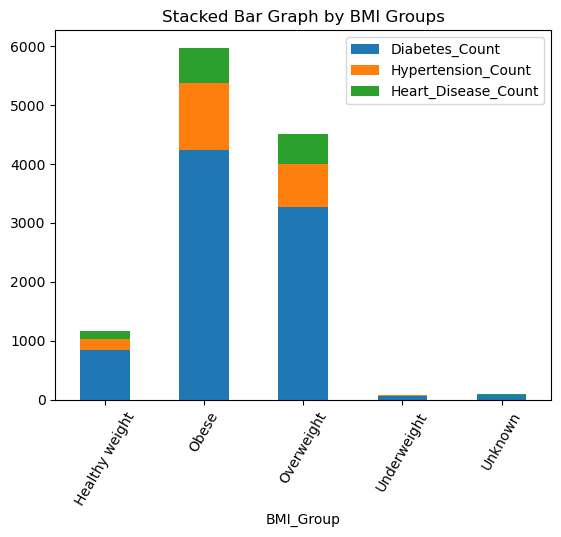

In [697]:
# Total counts for heart disease, diabetes, hypertension by BMI group
bmi_health_counts.plot(x='BMI_Group', kind='bar', stacked=True, title='Stacked Bar Graph by BMI Groups')
plt.xticks(rotation=60)
plt.show()

### Male/Female Smokers by Age Distribution Histogram<a name="paragraph1"></a>

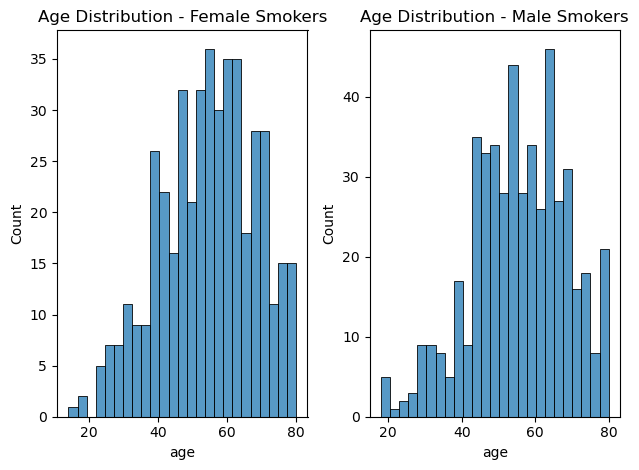

In [699]:
# Female and Male total smokers by age
fig, axs = plt.subplots(1,2)
sns.histplot(female_smokers['age'], bins = 25, ax= axs[0])
axs[0].set_title('Age Distribution - Female Smokers')

sns.histplot(male_smokers['age'], bins = 25, ax= axs[1])
axs[1].set_title('Age Distribution - Male Smokers')

plt.tight_layout()
plt.show()

### Health Profile Conditions Facet Grid<a name="paragraph1"></a>

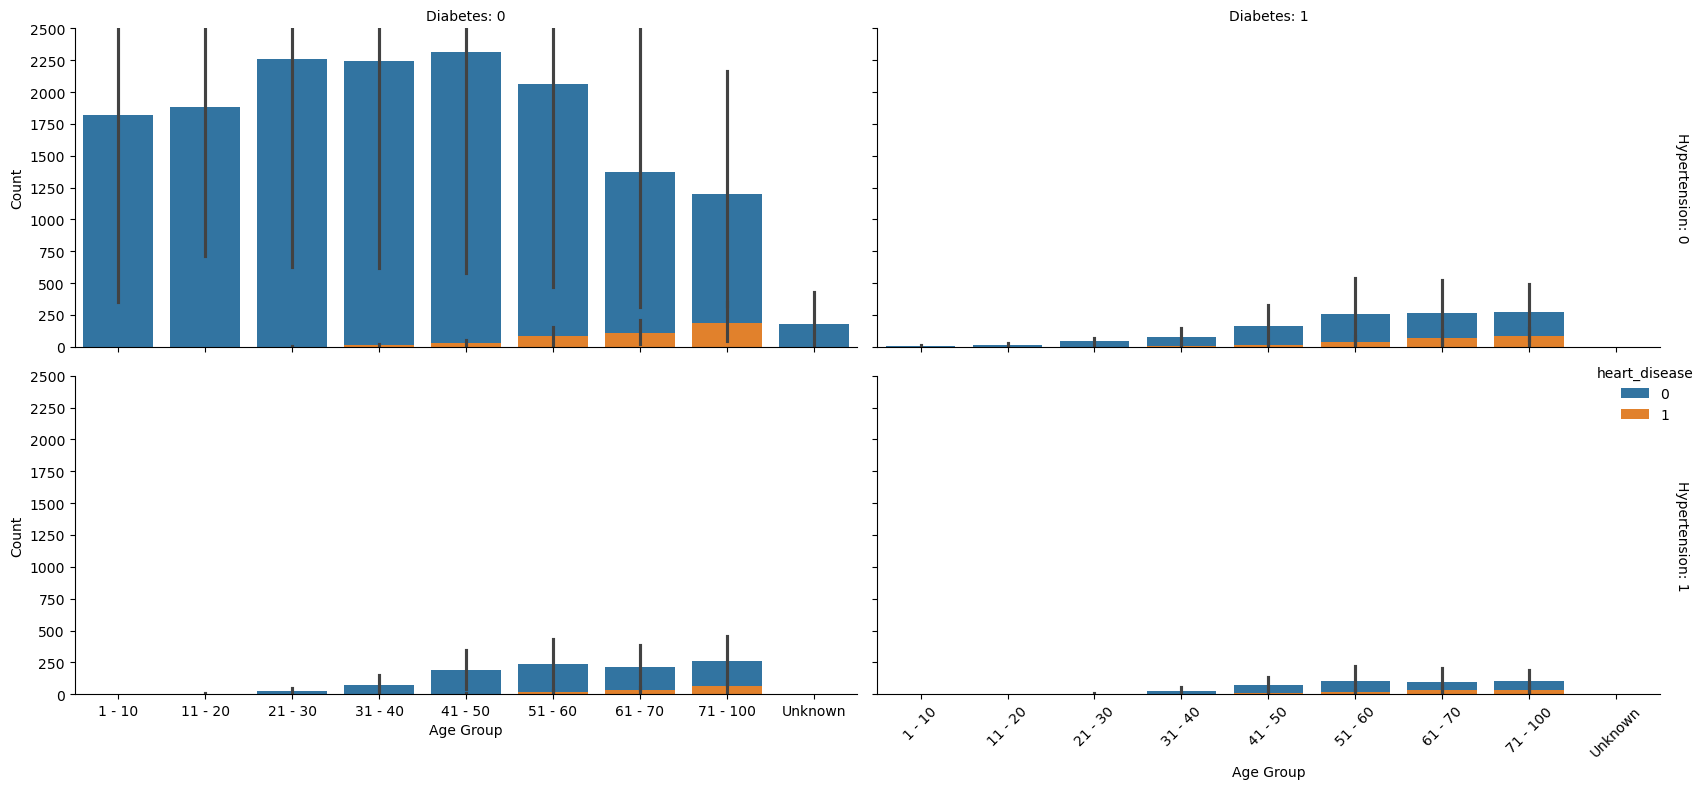

In [603]:
# Each of these visualizations offers a unique 
# perspective of the data, allowing to explore different facets of health conditions across various demographics

from matplotlib.ticker import MaxNLocator

# Facet grid for each condition
g = sns.FacetGrid(
    health_profile,
    col='diabetes',
    row='hypertension',
    hue='heart_disease',
    margin_titles=True,
    height=4,
    aspect=2
)

g.map(sns.barplot, 'Age_Group', 'Count', order=health_profile['Age_Group'].unique())
g.set_axis_labels('Age Group', 'Count')
g.set_titles(col_template='Diabetes: {col_name}', row_template='Hypertension: {row_name}')
for ax in g.axes.flatten():  # Ensure y-axis ticks are integers
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
    ax.set_ylim(0, 2500)

g.add_legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pearson Correlation Heat Map<a name="paragraph1"></a>

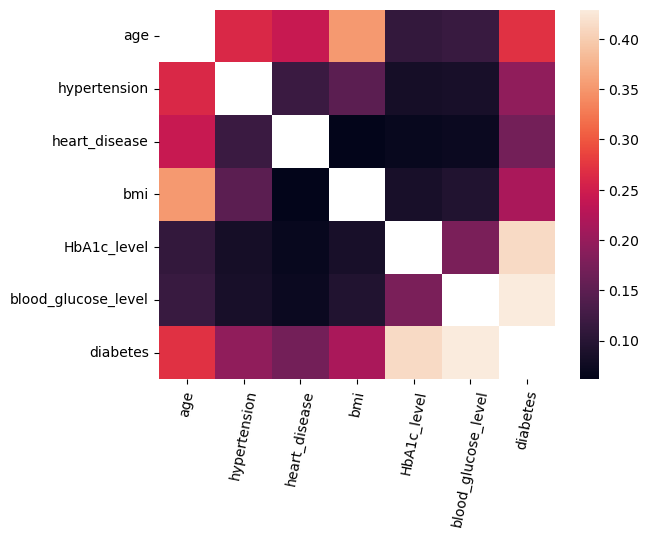

In [537]:
# Here the Pearson correlation heat map indicates the strength and direction of correlations making it easier to spot patterns among all of 
# the numerical data 
all_correlations = df.select_dtypes(include=['number']).corr(method='pearson')
all_correlations = all_correlations[(all_correlations > 0) & (all_correlations < 1)]
sns.heatmap(all_correlations)
plt.xticks(rotation=79)
plt.show()

### Pair Plot Numerical Data<a name="paragraph1"></a>

In [ ]:
# Because of the large amount of numerical data im dealing with in the set
# A pairplot helps understand all the overlapping relationships quite well

In [475]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

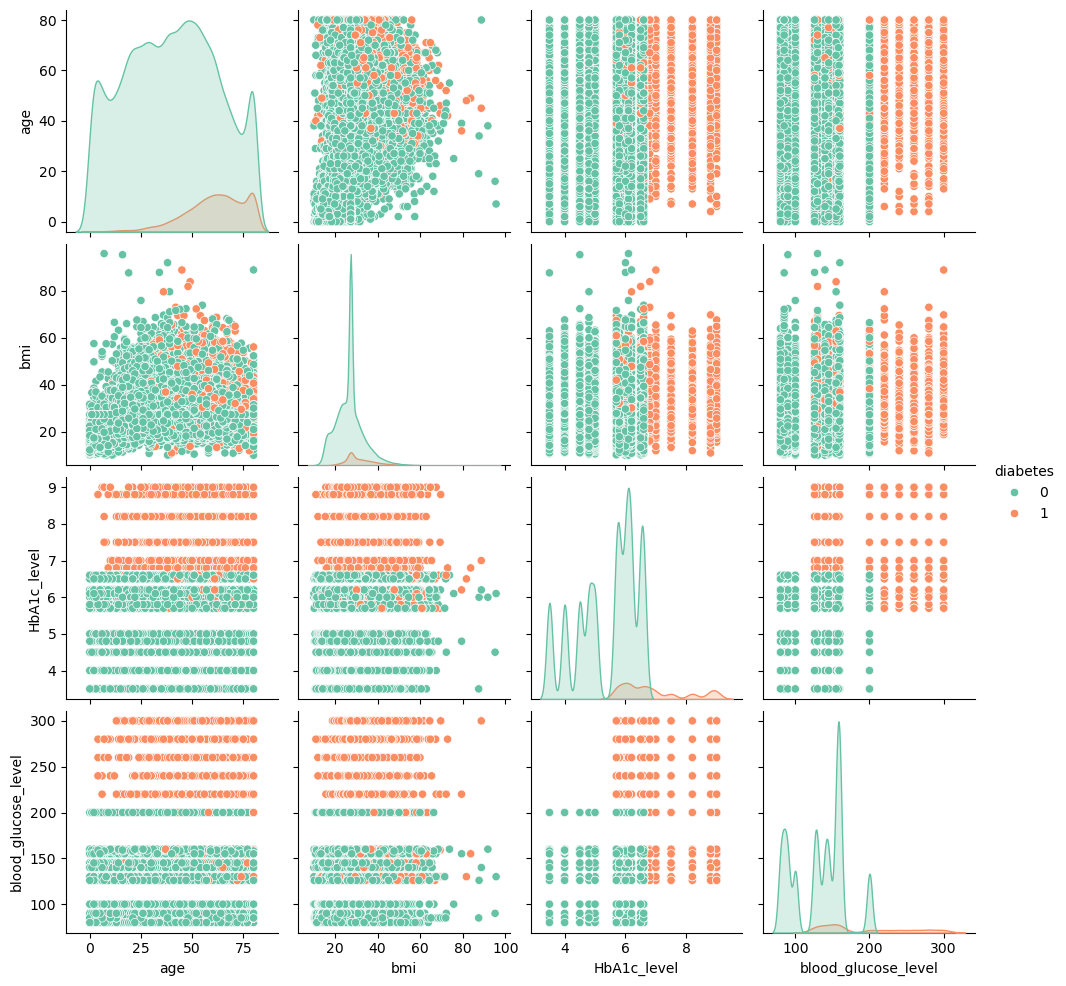

In [477]:
sns.pairplot(df, vars=numerical_columns, hue='diabetes', diag_kind='kde', palette='Set2')
plt.show()

# Summary <a name="paragraph1"></a>

### Report <a name="paragraph1"></a>

In [515]:
summary = df.describe().round(2)
summary.drop(index='count').transpose()

,mean,std,min,25%,50%,75%,max
age,41.78,22.47,0.00,24.00,43.00,59.0,80.00
hypertension,0.08,0.27,0.00,0.00,0.00,0.0,1.00
heart_disease,0.04,0.20,0.00,0.00,0.00,0.0,1.00
bmi,27.32,6.89,10.01,23.18,27.32,30.1,95.69
HbA1c_level,5.54,1.08,3.50,4.80,5.80,6.2,9.00
blood_glucose_level,138.38,41.10,80.00,100.00,140.00,159.0,300.00
diabetes,0.09,0.29,0.00,0.00,0.00,0.0,1.00
